<h1>Importing Liabraries</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras.models import *

<h1>Initial Image Processing</h1>

<h2>1st Method</h2>

In [ ]:
path = '/content/drive/MyDrive/IP-2022(Project)/sudoku_img.jpg'
orig_img = plt.imread(path)
img = cv.cvtColor(orig_img,cv.COLOR_RGB2GRAY)
img = cv.resize(img,(512,512))
copy = img.copy()
img_blur = cv.GaussianBlur(img,(3,3),0)
img_threshold = cv.adaptiveThreshold(img,255,1,1,11,2)
contours,hierarchy = cv.findContours(img_threshold,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

maxi = 0

for c in contours:
    peri = cv.arcLength(c,True)
    approx = cv.approxPolyDP(c, 0.015*peri,True)

    if len(approx) == 4 and maxi < cv.contourArea(c):
         maxi_approx = approx
         maxi = cv.contourArea(c)
         top_l = approx[0]
         top_r = approx[1]
         bot_r = approx[2]
         bot_l = approx[3]
# cv.drawContours(copy,contours,-1,(0,255,0),2)

print("values obtained from approx ")
print("top left ",top_l," top_r ",top_r," bottom right ",bot_r," bottom left ",bot_l)

values obtained from approx 
top left  [[73 71]]  top_r  [[ 71 438]]  bottom right  [[438 441]]  bottom left  [[440  73]]


top left coords  [73 71]  top right coords  [ 71 438]  bottom right coords  [438 441]  bottom left coords  [440  73]


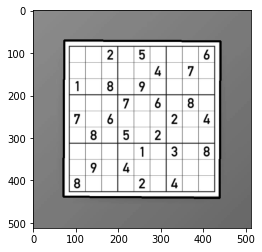

In [ ]:
# Ordering the points

coordinate_list = [top_l[0],top_r[0],bot_r[0],bot_l[0]]
min_index1 = -1
min_index2 = -1
min_x1 = 1000
min_x2 = 1000

# choosing minimum 2 x values along with y coordinate
for i in range(4):

    x_coord = coordinate_list[i][1]
    y_coord = coordinate_list[i][0]

    
    if(min_index1 == -1): 
        min_index1 = i
        min_x1 = x_coord 
    
    elif (min_index2 == -1):

        if(min_x1 > x_coord):
            min_x2 = min_x1 
            min_index2 = min_x1
            min_x1 = x_coord
            min_index1 = i 

        else:
            min_x2 = x_coord
            min_index2 = i 

    else:

        if(min_x1 > x_coord):
            min_x2 = min_x1 
            min_index2 = min_index1
            min_x1 = x_coord 
            min_index1 = i 
        
        elif(min_x2 > x_coord):
            min_x2 = x_coord
            min_index2 = i 



# declarting bottol left and top right corners
bottom_left_coords = []
bottom_left_index = -1
top_left_coords = []
top_left_index = -1

if(coordinate_list[min_index1][0] < coordinate_list[min_index2][0]):
    
    bottom_left_coords = coordinate_list[min_index2] 
    bottom_left_index = min_index2 
    
    top_left_coords = coordinate_list[min_index1] 
    top_left_index = min_index1

else:

    bottom_left_coords = coordinate_list[min_index1]
    bottom_left_index = min_index1

    top_left_coords = coordinate_list[min_index2]
    top_left_index  = min_index2


max_index1 = -1
max_index2 = -1 

for i in range(4):

    if(i != min_index1 and i != min_index2):
        
        if(max_index1 == -1):
            max_index1 = i 
        else:
            max_index2 = i 

#finding top right and bottom right coordinates 

bottom_right_coords = []
bottom_right_index = -1
top_right_coords = []
top_right_index = -1

if(coordinate_list[max_index1][0] > coordinate_list[max_index2][0]):
    
    bottom_right_coords = coordinate_list[max_index1]
    bottom_right_index = max_index1 
    
    top_right_coords = coordinate_list[max_index2]
    bottom_right_index = max_index2

else:

    bottom_right_coords = coordinate_list[max_index2]
    bottom_right_index = max_index2

    top_right_coords = coordinate_list[max_index1]
    top_right_index = max_index1

print("top left coords ",top_left_coords," top right coords ",top_right_coords," bottom right coords ",bottom_right_coords," bottom left coords ",bottom_left_coords)

pts1 = np.array([top_left_coords,top_right_coords,bottom_right_coords,bottom_left_coords])
pts = np.array([top_left_coords,top_right_coords,bottom_right_coords,bottom_left_coords],np.float32)
copy = cv.polylines(copy,[pts1],True,(0,255,255),4)

plt.imshow(copy,cmap='gray')

src points  [[ 73.  71.]
 [ 71. 438.]
 [438. 441.]
 [440.  73.]]
destination points are  [[ 71.  71.]
 [ 71. 441.]
 [440. 441.]
 [440.  71.]]


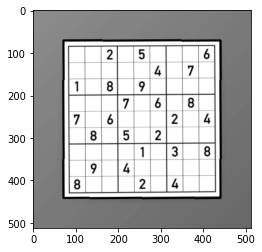

In [ ]:
top_l_x = min(top_left_coords[1],bottom_left_coords[1])
top_l_y = min(top_left_coords[0],top_right_coords[0])
bot_l_y = max(bottom_left_coords[0],bottom_right_coords[0])
top_r_x = max(top_right_coords[1],bottom_right_coords[1])


p1 = [top_l_y,top_l_x]
p2 = [top_l_y,top_r_x]
p3 = [bot_l_y,top_r_x]
p4 = [bot_l_y,top_l_x]


exp_pts = np.array([p1,p2,p3,p4],np.float32)

print("src points ",pts)
print("destination points are ",exp_pts)

matrix = cv.getPerspectiveTransform(pts, exp_pts)
result = cv.warpPerspective(copy, matrix, (512,512))

plt.imshow(result, cmap='gray')

<h2>2nd Method</h2>

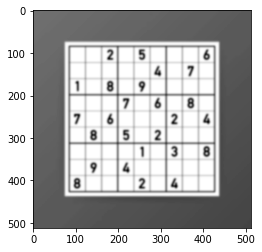

In [ ]:
# img = result
originalimage = np.copy(img)
img_blur = cv.GaussianBlur(img,(11,11),0)
plt.imshow(img_blur, cmap='gray')

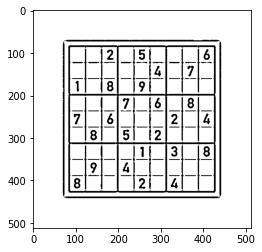

In [ ]:
img_threshold = cv.adaptiveThreshold(img_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C | cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 5, 2)
plt.imshow(img_threshold,cmap='gray')

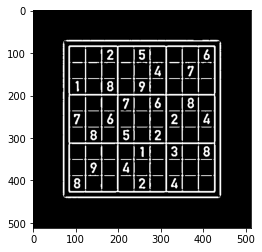

In [ ]:
img_inverted = cv.bitwise_not(img_threshold)
plt.imshow(img_inverted,cmap='gray')

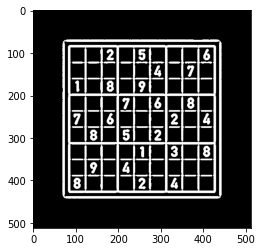

In [ ]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
img_dilate = cv.dilate(img_inverted, kernel)

plt.imshow(img_dilate,cmap='gray')

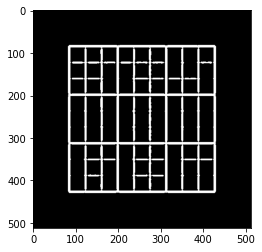

In [ ]:
#Using flood filling 
outerbox = img_dilate
maxi = -1
maxpt = None
value = 10
height, width = np.shape(outerbox)

for y in range(height):
    row = img_dilate[y]
    for x in range(width):
        if row[x] >= 128:
            area = cv.floodFill(outerbox, None, (x, y), 64)[0]
            if value > 0:
                value -= 1
            if area > maxi:
                maxpt = (x, y)
                maxi = area

cv.floodFill(outerbox, None, maxpt, (255, 255, 255))

for y in range(height):
    row = img_dilate[y]
    for x in range(width):
        if row[x] == 64 and x != maxpt[0] and y != maxpt[1]:
            cv.floodFill(outerbox, None, (x, y), 0)

plt.imshow(outerbox,cmap='gray')

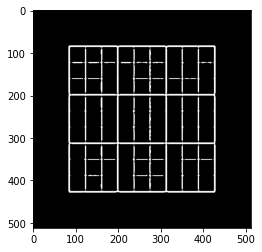

In [ ]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
outerbox = cv.erode(outerbox, kernel)

plt.imshow(outerbox,cmap='gray')

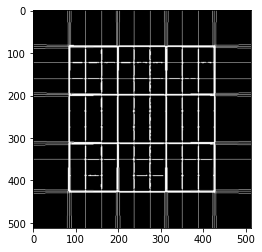

In [ ]:
def drawLine(line, img):
    height, width = np.shape(img)
    if line[0][1] != 0:
        m = -1 / np.tan(line[0][1])
        c = line[0][0] / np.sin(line[0][1])
        cv.line(img, (0, int(c)), (width, int(m * width + c)), 255)
    else:
        cv.line(img, (int(line[0][0]), 0), (int(line[0][0]), int(height)), 255)
    return img

lines = cv.HoughLines(outerbox, 1, np.pi / 180, 200)
tmpimg = np.copy(outerbox)

for i in range(len(lines)):
    tmpimp = drawLine(lines[i], tmpimg)

plt.imshow(tmpimg,cmap='gray')

In [ ]:
#MERGING
def mergeLines(lines, img):
    height, width = np.shape(img)
    for current in lines:
        if current[0][0] is None and current[0][1] is None:
            continue
        p1 = current[0][0]
        theta1 = current[0][1]
        pt1current = [None, None]
        pt2current = [None, None]
        #If the line is almost vertical
        if theta1 > np.pi * 45 / 180 and theta1 < np.pi * 135 / 180:
            pt1current[0] = 0
            pt1current[1] = p1 / np.sin(theta1)
            pt2current[0] = width
            pt2current[1] = -pt2current[0] / np.tan(theta1) + p1 / np.sin(theta1)
        #If the line is almost horizontal
        else:
            pt1current[1] = 0
            pt1current[0] = p1 / np.cos(theta1)
            pt2current[1] = height
            pt2current[0] = -pt2current[1] * np.tan(theta1) + p1 / np.cos(theta1)
        #Now to fuse lines
        for pos in lines:
            if pos[0].all() == current[0].all():
                continue
            if abs(pos[0][0] - current[0][0]) < 20 and abs(pos[0][1] - current[0][1]) < np.pi * 10 / 180:
                p = pos[0][0]
                theta = pos[0][1]
                pt1 = [None, None]
                pt2 = [None, None]
                # If the line is almost horizontal
                if theta > np.pi * 45 / 180 and theta < np.pi * 135 / 180:
                    pt1[0] = 0
                    pt1[1] = p / np.sin(theta)
                    pt2[0] = width
                    pt2[1] = -pt2[0] / np.tan(theta) + p / np.sin(theta)
                # If the line is almost vertical
                else:
                    pt1[1] = 0
                    pt1[0] = p / np.cos(theta)
                    pt2[1] = height
                    pt2[0] = -pt2[1] * np.tan(theta) + p / np.cos(theta)
                #If the endpoints are close to each other, merge the lines
                if (pt1[0] - pt1current[0])*2 + (pt1[1] - pt1current[1])*2 < 642 and (pt2[0] - pt2current[0])*2 + (pt2[1] - pt2current[1])*2 < 64*2:
                    current[0][0] = (current[0][0] + pos[0][0]) / 2
                    current[0][1] = (current[0][1] + pos[0][1]) / 2
                    pos[0][0] = None
                    pos[0][1] = None
    #Now to remove the "None" Lines
    lines = list(filter(lambda a : a[0][0] is not None and a[0][1] is not None, lines))
    return lines

#Call the Merge Lines function and store the fused lines
lines = mergeLines(lines, outerbox)


In [ ]:
#Now to find the extreme lines (The approximate borders of our sudoku board

topedge = [[1000, 1000]]
bottomedge = [[-1000, -1000]]
leftedge = [[1000, 1000]]
leftxintercept = 50000
rightedge = [[-1000, -1000]]
rightxintercept = 0
for i in range(len(lines)):
    current = lines[i][0]
    p = current[0]
    theta = current[1]
    xIntercept = p / np.cos(theta)

    #If the line is nearly vertical
    if theta > np.pi * 80 / 180 and theta < np.pi * 100 / 180:
        if p < topedge[0][0]:
            topedge[0] = current[:]
        if p > bottomedge[0][0]:
            bottomedge[0] = current[:]

    #If the line is nearly horizontal
    if theta < np.pi * 10 / 180 or theta > np.pi * 170 / 180:
        if xIntercept > rightxintercept:
            rightedge[0] = current[:]
            rightxintercept = xIntercept
        elif xIntercept <= leftxintercept:
            leftedge[0] = current[:]
            leftxintercept = xIntercept

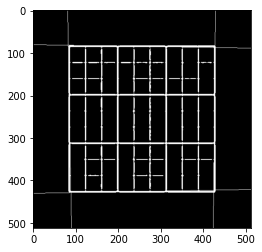

In [ ]:
#Drawing the lines

tmpimg= np.copy(outerbox)
tmppp = np.copy(originalimage)
tmppp = drawLine(leftedge, tmppp)
tmppp = drawLine(rightedge, tmppp)
tmppp = drawLine(topedge, tmppp)
tmppp = drawLine(bottomedge, tmppp)

tmpimg = drawLine(leftedge, tmpimg)
tmpimg = drawLine(rightedge, tmpimg)
tmpimg = drawLine(topedge, tmpimg)
tmpimg = drawLine(bottomedge, tmpimg)

plt.imshow(tmpimg,cmap='gray')

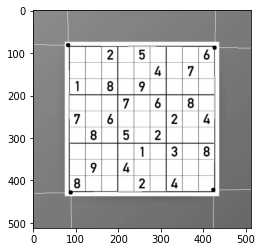

In [ ]:
leftedge = leftedge[0]
rightedge = rightedge[0]
bottomedge = bottomedge[0]
topedge = topedge[0]

# Calculating two points that lie on each of the four lines
left1 = [None, None]
left2 = [None, None]
right1 = [None, None]
right2 = [None, None]
top1 = [None, None]
top2 = [None, None]
bottom1 = [None, None]
bottom2 = [None, None]

if leftedge[1] != 0:
    left1[0] = 0
    left1[1] = leftedge[0] / np.sin(leftedge[1])
    left2[0] = width
    left2[1] = -left2[0] / np.tan(leftedge[1]) + left1[1]
else:
    left1[1] = 0
    left1[0] = leftedge[0] / np.cos(leftedge[1])
    left2[1] = height
    left2[0] = left1[0] - height * np.tan(leftedge[1])

if rightedge[1] != 0:
    right1[0] = 0
    right1[1] = rightedge[0] / np.sin(rightedge[1])
    right2[0] = width
    right2[1] = -right2[0] / np.tan(rightedge[1]) + right1[1]
else:
    right1[1] = 0
    right1[0] = rightedge[0] / np.cos(rightedge[1])
    right2[1] = height
    right2[0] = right1[0] - height * np.tan(rightedge[1])

bottom1[0] = 0
bottom1[1] = bottomedge[0] / np.sin(bottomedge[1])

bottom2[0] = width
bottom2[1] = -bottom2[0] / np.tan(bottomedge[1]) + bottom1[1]

top1[0] = 0
top1[1] = topedge[0] / np.sin(topedge[1])
top2[0] = width
top2[1] = -top2[0] / np.tan(topedge[1]) + top1[1]

# Next, we find the intersection of these four lines

leftA = left2[1] - left1[1]
leftB = left1[0] - left2[0]
leftC = leftA * left1[0] + leftB * left1[1]

rightA = right2[1] - right1[1]
rightB = right1[0] - right2[0]
rightC = rightA * right1[0] + rightB * right1[1]

topA = top2[1] - top1[1]
topB = top1[0] - top2[0]
topC = topA * top1[0] + topB * top1[1]

bottomA = bottom2[1] - bottom1[1]
bottomB = bottom1[0] - bottom2[0]
bottomC = bottomA * bottom1[0] + bottomB * bottom1[1]

# Intersection of left and top

detTopLeft = leftA * topB - leftB * topA

ptTopLeft = ((topB * leftC - leftB * topC) / detTopLeft, (leftA * topC - topA * leftC) / detTopLeft)

# Intersection of top and right

detTopRight = rightA * topB - rightB * topA

ptTopRight = ((topB * rightC - rightB * topC) / detTopRight, (rightA * topC - topA * rightC) / detTopRight)

# Intersection of right and bottom

detBottomRight = rightA * bottomB - rightB * bottomA

ptBottomRight = ((bottomB * rightC - rightB * bottomC) / detBottomRight, (rightA * bottomC - bottomA * rightC) / detBottomRight)

# Intersection of bottom and left

detBottomLeft = leftA * bottomB - leftB * bottomA

ptBottomLeft = ((bottomB * leftC - leftB * bottomC) / detBottomLeft,
                        (leftA * bottomC - bottomA * leftC) / detBottomLeft)

# Plotting the found extreme points
cv.circle(tmppp, (int(ptTopLeft[0]), int(ptTopLeft[1])), 5, 0, -1)
cv.circle(tmppp, (int(ptTopRight[0]), int(ptTopRight[1])), 5, 0, -1)
cv.circle(tmppp, (int(ptBottomLeft[0]), int(ptBottomLeft[1])), 5, 0, -1)
cv.circle(tmppp, (int(ptBottomRight[0]), int(ptBottomRight[1])), 5, 0, -1)

plt.imshow(tmppp, cmap='gray')

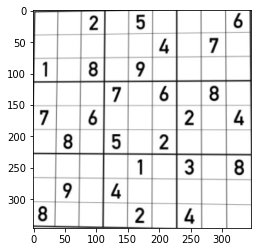

In [ ]:
#Finding the maximum length side

leftedgelensq = (ptBottomLeft[0] - ptTopLeft[0])**2 + (ptBottomLeft[1] - ptTopLeft[1])**2
rightedgelensq = (ptBottomRight[0] - ptTopRight[0])**2 + (ptBottomRight[1] - ptTopRight[1])**2
topedgelensq = (ptTopRight[0] - ptTopLeft[0])**2 + (ptTopLeft[1] - ptTopRight[1])**2
bottomedgelensq = (ptBottomRight[0] - ptBottomLeft[0])**2 + (ptBottomLeft[1] - ptBottomRight[1])**2
maxlength = int(max(leftedgelensq, rightedgelensq, bottomedgelensq, topedgelensq)**0.5)

#Correcting the skewed perspective
src = [(0, 0)] * 4
dst = [(0, 0)] * 4
src[0] = ptTopLeft[:]
dst[0] = (0, 0)
src[1] = ptTopRight[:]
dst[1] = (maxlength - 1, 0)
src[2] = ptBottomRight[:]
dst[2] = (maxlength - 1, maxlength - 1)
src[3] = ptBottomLeft[:]
dst[3] = (0, maxlength - 1)
src = np.array(src).astype(np.float32)
dst = np.array(dst).astype(np.float32)
extractedgrid = cv.warpPerspective(originalimage, cv.getPerspectiveTransform(src, dst), (maxlength, maxlength))

plt.imshow(extractedgrid,cmap = 'gray')

# Loading Model and Splitting the Boxes

In [ ]:
model = load_model('/content/drive/MyDrive/IP-2022(Project)/model-OCR.h5')

extract = cv.resize(extractedgrid,(504,504))
zz = extract.copy()
zz = cv.cvtColor(zz,cv.COLOR_GRAY2RGB)
zz = cv.resize(zz,(504,504))

rows = np.vsplit(extract,9)

boxes = []

for r in rows:
    cols = np.hsplit(r,9)
    for box in cols:
        box = np.array(cv.resize(box,(48,48))/255.0).astype('float32')
        kernel = np.ones((4,4), np.uint8)
        box = cv.erode(box, kernel, iterations=1)
        box = cv.dilate(box, kernel, iterations=1)
        boxes.append(box)

boxes = np.array(boxes).reshape(-1, 48, 48, 1)

classes = np.arange(0, 10)
prediction = model.predict(boxes)

predicted_numbers = []

for i in prediction:
    index = (np.argmax(i))
    predicted_number = classes[index]
    predicted_numbers.append(predicted_number)

board_num = np.array(predicted_numbers).astype('uint8').reshape(9, 9)

print(board_num)

[[0 0 2 0 5 0 0 0 6]
 [0 0 0 0 0 4 0 7 0]
 [1 0 8 0 9 0 0 0 0]
 [0 0 0 7 0 6 0 8 0]
 [7 0 6 0 0 0 2 0 4]
 [0 8 0 5 0 2 0 0 0]
 [0 0 0 0 1 0 3 0 8]
 [0 9 0 4 0 0 0 0 0]
 [8 0 0 0 2 0 4 0 0]]


# Sudoku Solver Using Backtracking

In [ ]:
N = 9

def printing(arr):
	for i in range(N):
		for j in range(N):
			print(arr[i][j], end = " ")
		print()

def isSafe(grid, row, col, num):

	for x in range(9):
		if grid[row][x] == num:
			return False

	for x in range(9):
		if grid[x][col] == num:
			return False

	startRow = row - row % 3
	startCol = col - col % 3
	for i in range(3):
		for j in range(3):
			if grid[i + startRow][j + startCol] == num:
				return False
	return True

def solveSudoku(grid, row, col):

	if (row == N - 1 and col == N):
		return True

	if col == N:
		row += 1
		col = 0

	if grid[row][col] > 0:
		return solveSudoku(grid, row, col + 1)
	for num in range(1, N + 1, 1):
	
		if isSafe(grid, row, col, num):
			grid[row][col] = num

			if solveSudoku(grid, row, col + 1):
				return True

		grid[row][col] = 0
	return False

grid = board_num.tolist()

if (solveSudoku(grid, 0, 0)):
	printing(grid)
else:
	print("no solution exists ")


4 7 2 8 5 1 9 3 6 
3 5 9 2 6 4 8 7 1 
1 6 8 3 9 7 5 4 2 
5 2 4 7 3 6 1 8 9 
7 3 6 1 8 9 2 5 4 
9 8 1 5 4 2 7 6 3 
6 4 7 9 1 5 3 2 8 
2 9 3 4 7 8 6 1 5 
8 1 5 6 2 3 4 9 7 


In [ ]:
w,h = extract.shape
coords =[]

for i in range(0,w,w//9):
  k = []
  for j in range(0,h,h//9):
    k.append((j+h//30,i+w//14))
  coords.append(k)

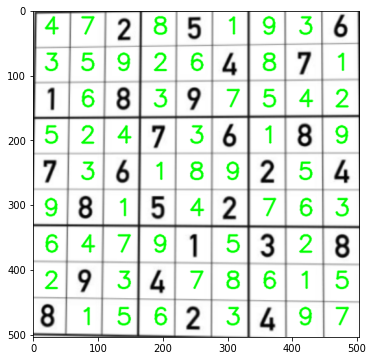

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
fontScale = 1.2
color = (0, 255, 0)
thickness = 2
temp = zz.copy()
plt.figure(figsize = (6,6))

for i in range(len(board_num)):
  for j in range(len(board_num)):
    if board_num[i][j] == 0:
      text = str(grid[i][j])
      org = coords[i][j]
      temp = cv.putText(temp, text, org, font, fontScale, color, thickness, cv.LINE_AA)
  
plt.imshow(temp)
